In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'depth'})
tmask = tmask.rename({'y' : 'gridY'})
tmask = tmask.rename({'x' : 'gridX'})
area = meshmask.e1t[0] * meshmask.e2t[0]
area = area.rename({'y': 'gridY'})
area = area.rename({'x': 'gridX'})
tmask

<xarray.DataArray 'tmask' (depth: 40, gridY: 898, gridX: 398)>
[14296160 values with dtype=int8]
Dimensions without coordinates: depth, gridY, gridX

In [3]:
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_vel = copy.copy(cm.curl)
cm_vel.set_bad('grey')
cm_delta = copy.copy(cm.delta)
cm_delta.set_bad('grey')

In [4]:
data = xr.open_dataset('/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_CO2_flux_20180101_20181231.nc')
data = data.drop(['time'])
time_values = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10','2018-11', '2018-12']
newdata = data.assign_coords(time = time_values)
newdata

<xarray.Dataset>
Dimensions:   (time: 12, gridY: 898, gridX: 398)
Coordinates:
  * gridY     (gridY) int64 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * gridX     (gridX) int64 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
  * time      (time) <U7 '2018-01' '2018-02' '2018-03' ... '2018-11' '2018-12'
Data variables:
    CO2_flux  (time, gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_wastewater_month_CO2_flux_20180101_20181231
    description:  Month-averaged CO2 Flux extracted from SalishSeaCast v20211...
    history:      2023-11-02 16:40 -07:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

In [5]:
new_CO2_flux = (newdata['CO2_flux'] * area).where(tmask.isel(depth = 0)).sum(axis = 2).sum(axis = 1) / area.where(tmask.isel(depth = 0)).sum()
new_CO2_flux

<xarray.DataArray (time: 12)>
array([-1.78675855e-04, -7.27475968e-05, -3.35423103e-06,  5.30597173e-06,
        1.82690250e-05,  1.68330257e-05,  3.77776201e-06, -1.49086260e-05,
       -3.96931479e-05, -8.51496840e-05, -1.61363684e-04, -2.62381793e-04])
Coordinates:
  * time     (time) <U7 '2018-01' '2018-02' '2018-03' ... '2018-11' '2018-12'

In [6]:
jan = '/results2/SalishSea/nowcast-green.202111/31jan18/SalishSea_1d_20180131_20180131_chem_T.nc'
feb = '/results2/SalishSea/nowcast-green.202111/28feb18/SalishSea_1d_20180228_20180228_chem_T.nc'
mar = '/results2/SalishSea/nowcast-green.202111/31mar18/SalishSea_1d_20180331_20180331_chem_T.nc'
apr = '/results2/SalishSea/nowcast-green.202111/30apr18/SalishSea_1d_20180430_20180430_chem_T.nc'
may = '/results2/SalishSea/nowcast-green.202111/31may18/SalishSea_1d_20180531_20180531_chem_T.nc'
jun = '/results2/SalishSea/nowcast-green.202111/30jun18/SalishSea_1d_20180630_20180630_chem_T.nc'
jul = '/results2/SalishSea/nowcast-green.202111/31jul18/SalishSea_1d_20180731_20180731_chem_T.nc'
aug = '/results2/SalishSea/nowcast-green.202111/31aug18/SalishSea_1d_20180831_20180831_chem_T.nc'
sep = '/results2/SalishSea/nowcast-green.202111/30sep18/SalishSea_1d_20180930_20180930_chem_T.nc'
octo = '/results2/SalishSea/nowcast-green.202111/31oct18/SalishSea_1d_20181031_20181031_chem_T.nc'
nov = '/results2/SalishSea/nowcast-green.202111/30nov18/SalishSea_1d_20181130_20181130_chem_T.nc'
dec = '/results2/SalishSea/nowcast-green.202111/31dec18/SalishSea_1d_20181231_20181231_chem_T.nc'

In [7]:
jan_file_list = glob.glob(jan)
feb_file_list = glob.glob(feb)
mar_file_list = glob.glob(mar)
apr_file_list = glob.glob(apr)
may_file_list = glob.glob(may)
jun_file_list = glob.glob(jun)
jul_file_list = glob.glob(jul)
aug_file_list = glob.glob(aug)
sep_file_list = glob.glob(sep)
octo_file_list = glob.glob(octo)
nov_file_list = glob.glob(nov)
dec_file_list = glob.glob(dec)

In [8]:
all_file_list = jan_file_list + feb_file_list + mar_file_list + apr_file_list + may_file_list + jun_file_list + jul_file_list + aug_file_list + sep_file_list + octo_file_list + nov_file_list + dec_file_list
combined_data = xr.open_mfdataset(all_file_list, data_vars=['CO2_flux'])

In [9]:
combined_data = combined_data.rename({'time_counter': 'time'})
combined_data = combined_data.rename({'x': 'gridX'})
combined_data = combined_data.rename({'y': 'gridY'})


In [10]:
basedata = combined_data
basedata = basedata.drop(['time'])
time_values = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10','2018-11', '2018-12']
basedata = basedata.assign_coords(time = time_values)
basedata

<xarray.Dataset>
Dimensions:                     (deptht: 40, gridY: 898, gridX: 398, time: 12)
Coordinates:
  * deptht                      (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
  * gridY                       (gridY) int64 0 1 2 3 4 ... 893 894 895 896 897
  * gridX                       (gridX) int64 0 1 2 3 4 ... 393 394 395 396 397
  * time                        (time) <U7 '2018-01' '2018-02' ... '2018-12'
Data variables:
    PAR                         (time, deptht, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    turbidity                   (time, deptht, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_inorganic_carbon  (time, deptht, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    total_alkalinity            (time, deptht, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_oxygen            (time, deptht, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    CO2_flux                    (time, gridY, gridX) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSeaCast_1d_chem_T_20180131_20180131
    description:  Day-averaged chemistry variables resampled from v202111 Sal...
    history:      2023-01-21 10:16 -08:00: Generated by reshapr.api.v1.extrac...
    Conventions:  CF-1.6

In [11]:
base_CO2_flux = (basedata['CO2_flux'] * area).where(tmask.isel(depth = 0)).sum(axis = 2).sum(axis = 1) / area.where(tmask.isel(depth = 0)).sum()
base_CO2_flux 

<xarray.DataArray (time: 12)>
dask.array<truediv, shape=(12,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) <U7 '2018-01' '2018-02' '2018-03' ... '2018-11' '2018-12'

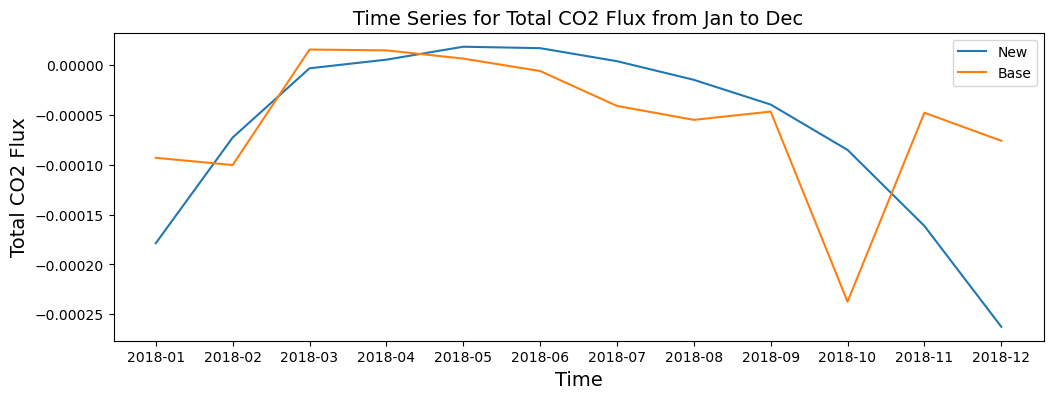

In [17]:
fig, axs = plt.subplots(1, 1, figsize=(12, 4))
new_CO2_flux.plot(ax=axs, label = "New")
base_CO2_flux.plot(ax=axs, label = "Base")
axs.set_title(f'Time Series for Total CO2 Flux from Jan to Dec', fontsize=14)
axs.set_xlabel('Time', fontsize=14)
axs.set_ylabel('Total CO2 Flux', fontsize=14)
axs.legend()
plt.show()